# Comparing the agents

In [1]:
#%matplotlib inline

import numpy as np
import itertools
import random
import math
import matplotlib.pyplot as plt
import tqdm

import import_ipynb
from rules import Game
from players import RandomPlayer, GreedyPlayer, MCTSPlayer, UCTPlayer, GreedyUCTPlayer, HumanPlayer

importing Jupyter notebook from rules.ipynb
importing Jupyter notebook from draw.ipynb
Current player: 0 - Score: 0/0
------------------
  5  5  6  0  5  5
  5  5  4  4  4  0
importing Jupyter notebook from players.ipynb


In [2]:
def play_game(player, opponent):
    game = Game.start_game()
    opponent_action = -1

    while not game.game_finished:
        player_action = player.play(opponent_action)
        game, captures, finished = game.step(player_action)

        player, opponent = opponent, player
        opponent_action = player_action
    return game

In [3]:
player = MCTSPlayer(0, 100)
opponent = HumanPlayer(1)

#endstate = play_game(player, opponent)
#print(endstate.winner)
#endstate.show_state()

In [7]:
from scipy.stats import binom

alpha = 0.01
n = 40# number of flips
p = 0.5 # fair
np.array(binom.interval(1 - alpha, n, p))/n

array([0.3, 0.7])

In [5]:
def greedy_vs_random(*args):
    # Create our players
    player = RandomPlayer(0)
    opponent = GreedyPlayer(1)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

In [6]:
def greedy_vs_mcts20(*args):
    # Create our players
    player = GreedyPlayer(0)
    opponent = MCTSPlayer(1, 20)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

def greedy_vs_mcts100(*args):
    # Create our players
    player = GreedyPlayer(0)
    opponent = MCTSPlayer(1, 100)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

In [7]:
def mcts_vs_mcts(*args):
    # Create our players
    player = MCTSPlayer(0, 20)
    opponent = MCTSPlayer(1, 50)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

In [8]:
def mcts_vs_uct(*args):
    # Create our players
    player = MCTSPlayer(0, 50)
    opponent = UCTPlayer(1, 50)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

In [18]:
def greedy_vs_uct(*args):
    # Create our players
    player = GreedyPlayer(0)
    opponent = UCTPlayer(1, 50)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

In [24]:
def uct_vs_greedyuct(*args):
    # Create our players
    player = UCTPlayer(0, 50)
    opponent = GreedyUCTPlayer(1, 50)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

def uct50_vs_greedyuct20(*args):
    # Create our players
    player = UCTPlayer(0, 50)
    opponent = GreedyUCTPlayer(1, 20)
    
    # Run a full game
    game = play_game(player, opponent)
    
    return game.winner

In [25]:
import multiprocessing

pool = multiprocessing.Pool(4)
generator = list(range(20))

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

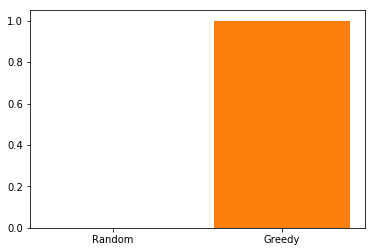

In [10]:
data = list(tqdm.tqdm_notebook(pool.imap(greedy_vs_random, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["Random", "Greedy"]);

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

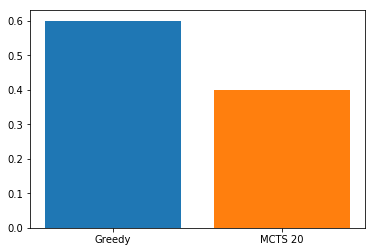

In [11]:
data = list(tqdm.tqdm_notebook(pool.imap(greedy_vs_mcts20, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["Greedy", "MCTS 20"]);

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

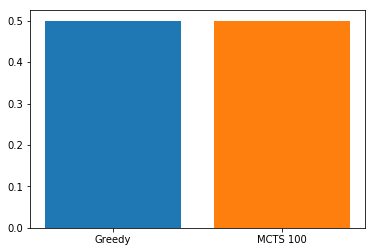

In [13]:
data = list(tqdm.tqdm_notebook(pool.imap(greedy_vs_mcts100, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["Greedy", "MCTS 100"]);

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

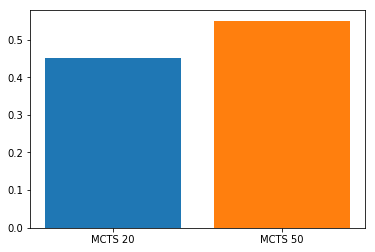

In [14]:
data = list(tqdm.tqdm_notebook(pool.imap(mcts_vs_mcts, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["MCTS 20", "MCTS 50"]);

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

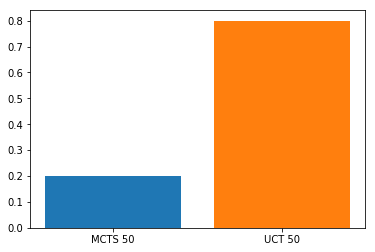

In [15]:
data = list(tqdm.tqdm_notebook(pool.imap(mcts_vs_uct, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["MCTS 50", "UCT 50"]);

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

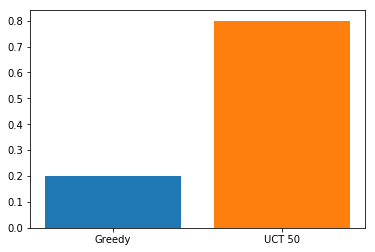

In [23]:
data = list(tqdm.tqdm_notebook(pool.imap(greedy_vs_uct, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["Greedy", "UCT 50"]);

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

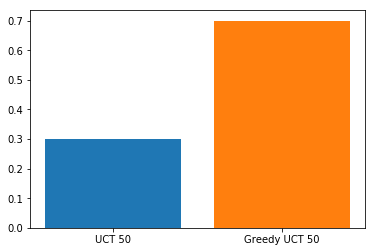

In [26]:
data = list(tqdm.tqdm_notebook(pool.imap(uct_vs_greedyuct, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["UCT 50", "Greedy UCT 50"]);

HBox(children=(IntProgress(value=0, max=20), HTML(value='')))

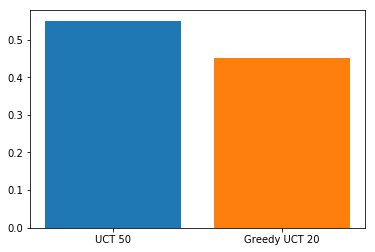

In [27]:
data = list(tqdm.tqdm_notebook(pool.imap(uct50_vs_greedyuct20, generator), total=len(generator)))
wins = sum(data) / len(data)
losses = 1 - wins

plt.bar(0, losses)
plt.bar(1, wins)
plt.xticks([0, 1], ["UCT 50", "Greedy UCT 20"]);

In [16]:
# %%time
# RUNS = 7
# factories = [
#     ("Random", lambda x: RandomPlayer(x)),
#     ("Greedy", lambda x: GreedyPlayer(x)),
    
#     ("MCTS 20", lambda x: MCTSPlayer(x, 20)),
#     ("MCTS 100", lambda x: MCTSPlayer(x, 100)),
    
#     ("UCT 20", lambda x: UCTPlayer(x, 20)),
#     ("UCT 100", lambda x: UCTPlayer(x, 100)),
    
#     ("Greedy UCT 20", lambda x: GreedyUCTPlayer(x, 20)),
#     ("Greedy UCT 100", lambda x: GreedyUCTPlayer(x, 100)),
# ]

# names = [x[0] for x in factories]
# games = []

# res = np.zeros((len(factories), len(factories), 2))
# iterable = list(itertools.product(enumerate(factories), repeat=2))
# for (i, (name1, factory1)), (j, (name2, factory2)) in tqdm.tqdm_notebook(iterable):
#     if i >= j:
#         continue
#     for _ in range(RUNS):
#         player = factory1(0)
#         opponent = factory2(1)

#         endstate = play_game(player, opponent)
#         res[i,j, endstate.winner] += 1
#         games.append((name1, name2, endstate))

# ratios = res[:,:, 1] - res[:,:, 0]

NameError: name 'ratios' is not defined

<Figure size 432x288 with 0 Axes>

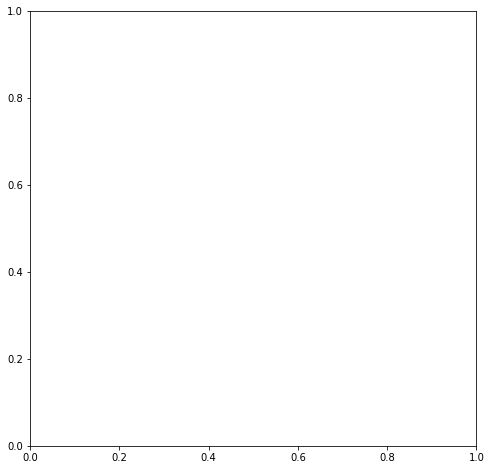

In [17]:
plt.set_cmap('RdYlGn')

fig, ax = plt.subplots(figsize=(8,8))

bornes = abs(ratios).max()
im = ax.imshow(ratios, vmin=-bornes, vmax=bornes)

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Wins minus losses (red means bottom is better)", rotation=-90, va="bottom")

ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(len(names)))

ax.set_xticklabels(names)
ax.set_yticklabels(names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(names)):
    for j in range(len(names)):
        s = "%i / %i" % (res[i, j, 0], res[i, j, 1])
        text = ax.text(j, i, s,
                       ha="center", va="center", color="w")

for edge, spine in ax.spines.items():
        spine.set_visible(False)
ax.set_xticks(np.arange(ratios.shape[1]+1)-.5, minor=True)
ax.set_yticks(np.arange(ratios.shape[0]+1)-.5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", bottom=False, left=False)
        
ax.set_title("Left wins / Bottom wins")
fig.tight_layout()
plt.show()

In [ ]:
player = GreedyUCTPlayer(0, 100)
opponent = HumanPlayer(1)

endstate = play_game(player, opponent)
print(endstate.winner)
endstate.show_state()

In [ ]:
nchilds = []
depths = []
for _, _, game in games:
    node = game
    depths.append(node.depth)
    while node.parent:
        nchilds.append(len(node.legal_actions))
        node = node.parent

In [ ]:
plt.hist(depths)